Following this guide for understanding and building: https://www.youtube.com/watch?v=PaCmpygFfXo

I'll add the ReadMe later, but in essence I feel like my understanding is best solidified when I code things out myself, so I will be closely following along with this tutorial to firmly grasp my understanding of how NLP models came to be form the ground up making my way to eventually transformers. 

In this exercise, I will be doing my best.

Also, building a bigram model from both the counting route to establish a distribution of likelihoods, then making my own single layer NN (log reg) employing as few tools as possible to make it happen. Hopefully commenting things well enough along the way. 

More on the model: This will be a character level model (predictions generate a single character at a time) and this example will take a single character as input to predict next 

In [2]:
import torch 

C:\Users\julio\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Loading in data 
words = open('names.txt', 'r').read().splitlines()

In [25]:
b = {} # dictionary containing all bigrams

# Creating bigram data set where the first character is the input and the second charater would be the output
for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(word,word[1:]): #making an interator out out 2 iterators. Just some fuckin clean python
        bigram = (ch1,ch2) # getting key from chracters pulled
        b[bigram] = b.get(bigram,0) + 1 # getting element from list and adding 1 to it (counting)

In [32]:
sorted(b.items(), key = lambda tupl: -tupl[1]) #sort in reverse by value on dict (unnecessarily complex) just for fun 

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [44]:
#instantiate the matrix for our values to fit into where leading letter are the columns, and second letter is the row:
import torch 

N = torch.zeros((28,28), dtype=torch.int32)

#Still needs rows and columns with data contained
chars = sorted(list(set(''.join(words))))
# Needs to be encoded for position s.t. we can fill out the data matrix:
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27


In [54]:
# Filling out matrix 
for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(word,word[1:]): #making an interator out out 2 iterators. Just some fuckin clean python
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        N[indx1,indx2] += 1 

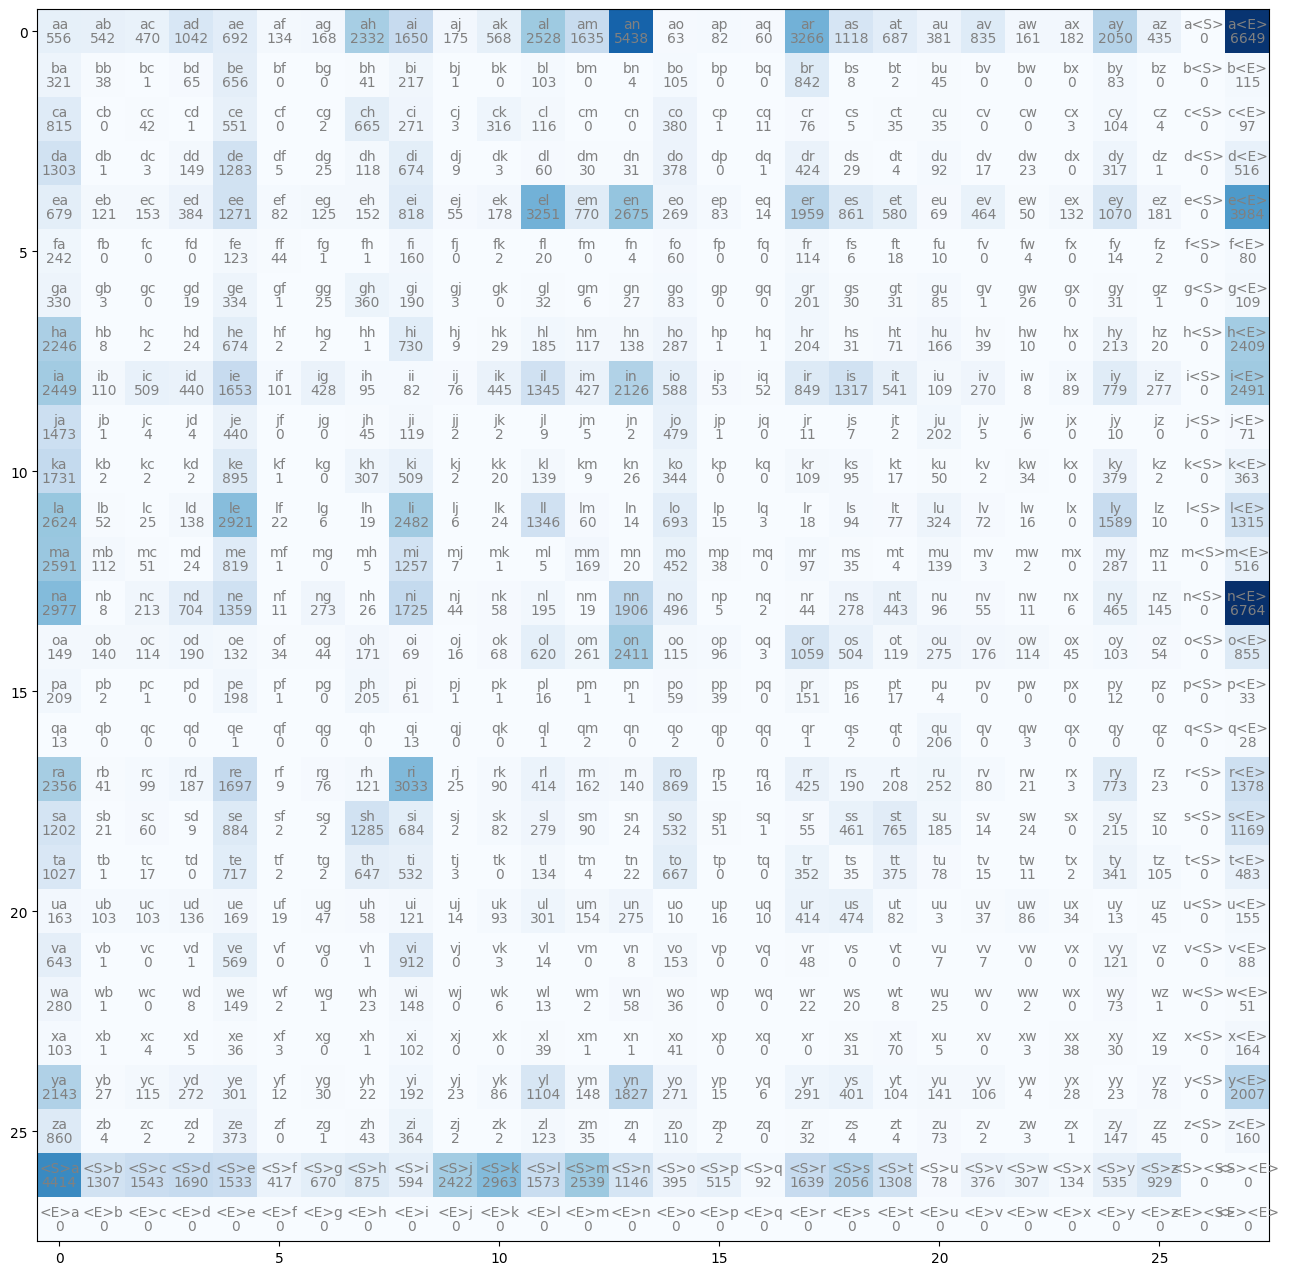

In [61]:
# This was a pivotal step in my full undertstanding of the subject so Im going to copy the full thing 
itos = {i:s for s,i in stoi.items()}

import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i]+itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
# Notice how there are two empty dimesnions: a<S> bc there can be no charater before the start marker, similarly <E>a bc there can be no character after the end marker

Reforming the dataset s.t. the redundancies are removed:


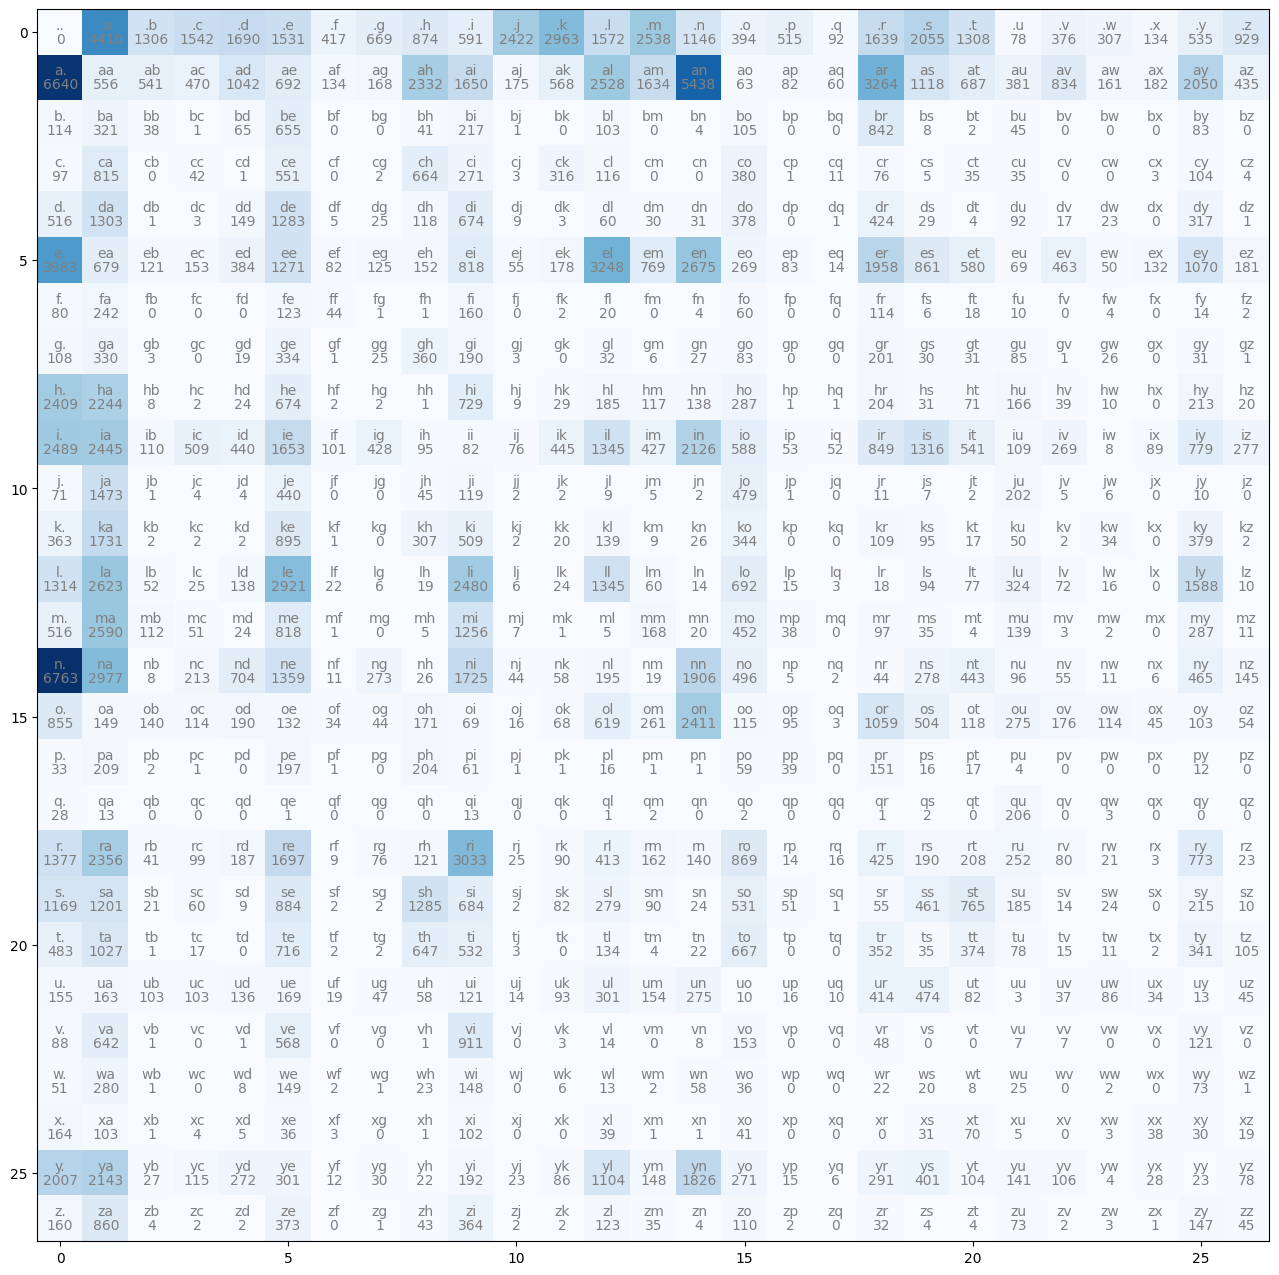

In [62]:
N = torch.zeros((27,27), dtype=torch.int32)

#Still needs rows and columns with data contained
chars = sorted(list(set(''.join(words))))
# Needs to be encoded for position s.t. we can fill out the data matrix:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# Filling out matrix 
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]): #making an interator out out 2 iterators. Just some fuckin clean python
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        N[indx1,indx2] += 1 


import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
# Notice how there are two empty dimesnions: a<S> bc there can be no charater before the start marker, similarly <E>a bc there can be no character after the end marker


In [64]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [69]:
# Just normalizing the row to be able to create a probability distribution to randomly sample from given their distribution
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [70]:
# Using more torch objects to set seed and sample:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [71]:
# torch.multinomial draws samples from distribution based on the distribution. 
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [82]:
# Pull samples from the distribution of the first row of the tensor, so out put is: given "." (start of string) the next letter to be randomly picked according to the distribution is 'm'
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p/p.sum()
indx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[indx]

'm'

In [95]:
# Now we loop it, to take the output as input until it hits the stop token ('.')
# Starting at the starting token @ position 0 
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    indx = 0
    name = []
    while True:
        # 
        p = N[indx].float()
        p = p/p.sum()
        indx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        letter = itos[indx]
        if indx == 0:
            print("".join(name))
            break
        name.append(letter)


mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl


In [96]:
# Bad results, but thats bc bigrams are awful, but not as bad as true randomness if you wanna see it:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    indx = 0
    name = []
    while True:
        # 
        p = torch.ones(27)
        p = p/p.sum()
        indx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        letter = itos[indx]
        if indx == 0:
            print("".join(name))
            break
        name.append(letter)

qvsaayxbqrqmyqwuznivanukotdjvdhd
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu
idcx
cekmzucjnjoeovjvrggqrjr
cfbhabkslpokc
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy
gszpw
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv
lfstdqigvncdoidetsukgdp
cfpjsxeqjcsmjwguzes


Cleaning it up the operations s.t. the matrix I pull from is not a count, but rather each row is a probabilty distribution 

In [102]:
p.shape

torch.Size([27])

In [103]:
P.sum() #Thats the total sum, and we're looking to divide only the count for the individual rows

tensor(228146.)

In [107]:
P.sum(dim=0, keepdim=True).T # dim=0 sums across rows, and keepdim allows for the matrix to have dimensions of (1,27), but want to divide across elementwise, so we can use broadcasting to make it easy

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [108]:
P = (N+1).float() # We add 1 just so no individual prediction leads to having an infinitely small probablilty. refered to as model smooothing
P = P/(P.sum(dim=0, keepdim=True).T)
# More memory conscious version 
# P/= P.sum(dim=0, keepdim=True).T

In [111]:
P[0,:].sum() #summing across a row to verify that my ass did it right, but also, just make sure you do this right. 

tensor(1.)

In [112]:
# Final version 
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    indx = 0
    name = []
    while True:
        p = P[indx]
        indx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        letter = itos[indx]
        if indx == 0:
            print("".join(name))
            break
        name.append(letter)

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl


Measuring Accuracy: Given a letter, whats the probability that the model guesses the next letter correctly. We have the right answer (ex. .emma. -> given "." prob of e is 0.05%, given "e" what is the prob of "m", yadda yadda) and we use that to calculate maximum log likelihood. This is the standard for measure model performance, but other methods could be included too. 

Some intuition behind the reasoning tho, you could just multiply out all the probabilities and measure model performance like that where the closer you are to 1, the better since 1 would indicate perfect predictions of the model. BUT multiplying out all those small numbers generates smaller and smaller numbers SO youre better off using a log function to make the number palpable. Recall that log(a * b * c) = log(a) + log(b) + log(c) making this metric easy to calculate out. The closer to 0, the better. 

But we end up with a huge negative number most of the time, so instead, we use negative loglikelihood, but then we punish our model by plainly summing the probablilities, so we have normalize to guage how well the model is doing by diving by the total number of samples.

Boom. We have a model with a single number to describe how accurate it is. To figure out what that looks like with a probablilty number just run the reverse of the operations:

prob -> sum(-log) -> /total ---> reverse ---> * total --> e^- --> /total --> prob

In [144]:
# Calculating individual probablities of all estimates based on our dataset:
import math
loglikelihood = 0 
total_bigrams = N.sum().item()
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]): #making an interator out out 2 iterators. Just some fuckin clean python
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        prob = P[indx1,indx2]
        logprob = torch.log(prob).item()
        loglikelihood += logprob
print('The closer to 0 the better:')
print(f'complete randomness would be if everything were equal to 1/27 * total_bigrams = {math.log(1/27) * total_bigrams:.4f}')
print(f'total loglikelihood:{loglikelihood:.4f}')
negativeloglikelihood = -loglikelihood
print('But that doesn\'t make much sense, so we apply the negative log likelihood')
print(f'complete randomness would be if everything were equal to 1/27 * total_bigrams = {-math.log(1/27) * total_bigrams:.4f}')
print(f'total loglikelihood: {negativeloglikelihood:.4f}')
print('But you don\'t want to punish your model for running more data which is what happens when you sum everything, so you normalize by dividing by the number of samples for average loss')
print(f'complete randomness would be if everything were equal to 1/27 * total_bigrams / total_bigrams = {-math.log(1/27):.4f} (lmao)')
print(f'average loglikelihood: {(negativeloglikelihood/total_bigrams):.4f}')


The closer to 0 the better:
complete randomness would be if everything were equal to 1/27 * total_bigrams = -751931.9976
total loglikelihood:-559873.5899
But that doesn't make much sense, so we apply the negative log likelihood
complete randomness would be if everything were equal to 1/27 * total_bigrams = 751931.9976
total loglikelihood: 559873.5899
But you don't want to punish your model for running more data which is what happens when you sum everything, so you normalize by dividing by the number of samples for average loss
complete randomness would be if everything were equal to 1/27 * total_bigrams / total_bigrams = 3.2958 (lmao)
average loglikelihood: 2.4540


### NN TIME!

Take a very different approach to attempt to get to a very similar solution. Going to create the same matrix as the one with probabilities from before that was based on count, but this time instead initialize the values to be random, then use loss and back prop to update the values in the matrix to be closer to what was present in the original count based matrix. 

In [191]:
# creating the training set of bigrams (x,y)
xs = []
ys = []
for word in words[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]): 
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(indx1)
        ys.append(indx2)
# To apply matrix and torch operations on the bigrams

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [152]:
# index representation to visualize how given 0 we're trying to get 5 as seen below
xs

tensor([ 0,  5, 13, 13,  1])

In [153]:
xy

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# Doesn't make sense to multiply these values with the associated weight of the matrix since it would lead to the position of the character increasing the probablility of that character being picked. Non-sensicle. 
# Instead one-hot enocding is applied to circumvent this issue where a single shape (1,27) matirx of zeros with a 1 in the position of the character indicates the input character. 
# From this results a single row picked out of the weights matrix which contains the probability distribution, then the same loss function is applied as before, but this time we apply back propogation
# Kind of glanced over in this series, but in essence, the derivative of the weight with respect to the loss determines the slope. You want to go down the slope, so you subtract that derivative. But you dont want to go too far along that direction, so you apply a learning rate.
# Then a small increment of movement is made to the weight, the loss is recalcualted, and the iterations go on until average loss levels out. 

In [160]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float() # Needs to be a float to be able to run common torch operations
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [163]:
# Initializing the weights
W = torch.randn((27,27)) # Generates normal distribution of numbers 
xenc @ W # multiplying our vectors
# results in a tensor containing all the plucked values for the respective one hot encoded vector. 

tensor([[-1.3219,  1.1802, -0.1834, -1.3075,  0.1261, -0.2061, -2.2732,  1.5695,
          0.9066, -0.2983,  0.7343,  0.7705, -1.2243, -0.7319,  0.6603, -0.1750,
         -0.0407, -0.1929, -0.5186,  1.1778, -0.2439, -0.0625, -1.0293, -0.0201,
          1.5206, -2.3608, -0.1071],
        [-0.5717, -1.5043,  0.4082,  1.5141,  0.8454,  0.6599,  0.2509,  1.4719,
          0.6135,  1.4316, -0.5310,  0.7230,  0.2443,  0.3082,  0.5819, -0.6750,
         -0.2678, -0.9036, -1.0394, -2.1067,  0.8655, -1.0667,  0.8169,  0.4736,
          0.7924, -0.8273, -1.6151],
        [-0.6523,  2.2707, -1.1379, -0.0245,  0.0110, -0.3252,  0.2223, -0.2470,
         -1.1398,  0.4087,  0.5113,  0.4559,  0.8804, -0.9032, -1.1186, -0.2179,
          0.3639, -0.4752,  0.0764,  0.8517,  1.5439, -0.3959,  0.3518,  0.2047,
         -0.1553, -0.0267,  1.3999],
        [-0.6523,  2.2707, -1.1379, -0.0245,  0.0110, -0.3252,  0.2223, -0.2470,
         -1.1398,  0.4087,  0.5113,  0.4559,  0.8804, -0.9032, -1.1186, -0.2179

In [170]:
#Explicitly showing how we pull probabilities for the situation "whats the probability of "m" given "m"?"

# m one hot from word ".emma" with 1 @ position 13
print(xenc[2])

# 13th row from multiplying with the big weight matrix 
print(xenc[2] @ W)

# Since 13 is the index of the second "m", pulling that element too 
print((xenc[2] @ W [13]).item())

# So for short 
(xenc @ W)[3, 13]


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.6523,  2.2707, -1.1379, -0.0245,  0.0110, -0.3252,  0.2223, -0.2470,
        -1.1398,  0.4087,  0.5113,  0.4559,  0.8804, -0.9032, -1.1186, -0.2179,
         0.3639, -0.4752,  0.0764,  0.8517,  1.5439, -0.3959,  0.3518,  0.2047,
        -0.1553, -0.0267,  1.3999])
-0.9032280445098877


In [174]:
# Now the weights need to be put into a workable format. Wont do counts since they end up being only integers and we need more fine grained control
# Won't do probability distribution directly since that has the condition that the sum of the probabilities come out to 1 and you lose control there too
# Need to let the homie breathe, but responsibly so things do mega scale anywhere.
# Answer: log(counts)
# To reverse, just exponentiate to get comparable "counts"

logits = xenc @ W #where W = log(counts)
counts = logits.exp() #equivalent to N matrix that showed the counts from before,
counts # But the scale of difference is way off from this matrix to the original one from before so we're gonna need a fucking huge learning rate that wouldn't be adviceable in any other situation

tensor([[ 0.2666,  3.2551,  0.8325,  0.2705,  1.1344,  0.8138,  0.1030,  4.8042,
          2.4759,  0.7421,  2.0840,  2.1608,  0.2940,  0.4810,  1.9353,  0.8394,
          0.9601,  0.8246,  0.5954,  3.2473,  0.7835,  0.9394,  0.3572,  0.9801,
          4.5751,  0.0943,  0.8985],
        [ 0.5646,  0.2222,  1.5041,  4.5454,  2.3290,  1.9346,  1.2852,  4.3574,
          1.8469,  4.1856,  0.5880,  2.0607,  1.2768,  1.3609,  1.7894,  0.5091,
          0.7651,  0.4051,  0.3537,  0.1216,  2.3762,  0.3441,  2.2635,  1.6057,
          2.2088,  0.4372,  0.1989],
        [ 0.5209,  9.6865,  0.3205,  0.9758,  1.0110,  0.7224,  1.2490,  0.7811,
          0.3199,  1.5049,  1.6674,  1.5776,  2.4118,  0.4053,  0.3267,  0.8042,
          1.4389,  0.6218,  1.0794,  2.3437,  4.6828,  0.6731,  1.4217,  1.2272,
          0.8561,  0.9736,  4.0547],
        [ 0.5209,  9.6865,  0.3205,  0.9758,  1.0110,  0.7224,  1.2490,  0.7811,
          0.3199,  1.5049,  1.6674,  1.5776,  2.4118,  0.4053,  0.3267,  0.8042

In [185]:
# Looking at probability version of it 
probs = counts / (counts.sum(dim=1, keepdim=True))
print(prob[0].sum()) #verify
probs

tensor(1.)


tensor([[0.0073, 0.0886, 0.0227, 0.0074, 0.0309, 0.0221, 0.0028, 0.1307, 0.0674,
         0.0202, 0.0567, 0.0588, 0.0080, 0.0131, 0.0527, 0.0228, 0.0261, 0.0224,
         0.0162, 0.0884, 0.0213, 0.0256, 0.0097, 0.0267, 0.1245, 0.0026, 0.0244],
        [0.0136, 0.0054, 0.0363, 0.1097, 0.0562, 0.0467, 0.0310, 0.1052, 0.0446,
         0.1010, 0.0142, 0.0497, 0.0308, 0.0328, 0.0432, 0.0123, 0.0185, 0.0098,
         0.0085, 0.0029, 0.0573, 0.0083, 0.0546, 0.0387, 0.0533, 0.0106, 0.0048],
        [0.0119, 0.2219, 0.0073, 0.0224, 0.0232, 0.0165, 0.0286, 0.0179, 0.0073,
         0.0345, 0.0382, 0.0361, 0.0552, 0.0093, 0.0075, 0.0184, 0.0330, 0.0142,
         0.0247, 0.0537, 0.1073, 0.0154, 0.0326, 0.0281, 0.0196, 0.0223, 0.0929],
        [0.0119, 0.2219, 0.0073, 0.0224, 0.0232, 0.0165, 0.0286, 0.0179, 0.0073,
         0.0345, 0.0382, 0.0361, 0.0552, 0.0093, 0.0075, 0.0184, 0.0330, 0.0142,
         0.0247, 0.0537, 0.1073, 0.0154, 0.0326, 0.0281, 0.0196, 0.0223, 0.0929],
        [0.0299, 0.0266,

In [199]:
# More organized version and seeded
# Making weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # Since I am applying back prop on this eventually, need to instantiate the underlying grad matrix

In [200]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W 
counts = logits.exp()
probs = counts / (counts.sum(dim=1, keepdim=True))
# last two lines are softmax
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [193]:
# forward pass clarified 
# creating the training set of bigrams (x,y) for 'emma'
xs = []
ys = []
for word in words[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]): 
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(indx1)
        ys.append(indx2)
# To apply matrix and torch operations on the bigrams

xs = torch.tensor(xs)
ys = torch.tensor(ys)

emma = len(xs)
# --------------------------------------------------
negativeloglikelihoods = torch.zeros(emma)
for i in range(emma):
    #i-th bigram
    x = xs[i].item()
    y = ys[i].item()
    print('------------')
    print(f'bigram example{i+1}: {itos[x]}{itos[y]} (indices {x},{y})')
    print('input to the neural net: ', x)
    print('output probabilities form the NN: ',probs[i])
    p = probs[i,y]
    print('probability assigned by the net to the correct character: ', p)
    logp = torch.log(p)
    print('log likelihood of correct char: ', logp)
    negativeloglikelihood = -logp
    print('negative log likelihood: ', negativeloglikelihood)
    negativeloglikelihoods[i] = negativeloglikelihood

print('===========')
print('average negative log likelihood (loss) = ', negativeloglikelihoods.mean().item())

. e
e m
m m
m a
a .
------------
bigram example1: .e (indices 0,5)
input to the neural net:  0
output probabilities form the NN:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
probability assigned by the net to the correct character:  tensor(0.0123)
log likelihood of correct char:  tensor(-4.3993)
negative log likelihood:  tensor(4.3993)
------------
bigram example2: em (indices 5,13)
input to the neural net:  5
output probabilities form the NN:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
probability assigned by the net to the correct character:  tensor(0.0181)
log likelihood of correct char:  tensor

In [201]:
# Back prop
W.grad = None #(resetting gradient to 0 but faster)
loss.backward()

In [202]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [203]:
# Update: 
W.data += -0.1 * W.grad

In [209]:
# Cleaned 

# forward pass to generate dataset 
xs = []
ys = []
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]): 
        indx1 = stoi[ch1]
        indx2 = stoi[ch2]
        xs.append(indx1)
        ys.append(indx2)
# To apply matrix and torch operations on the bigrams

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement() # len()

# More organized version and seeded
# Making weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [211]:
# Gradient Descent: separated from previous cell so as not to reset W
loss_recorded = []
for k in range(100):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W 
    counts = logits.exp()
    probs = counts / (counts.sum(dim=1, keepdim=True))
    # last two lines are softmax
    loss = -probs[torch.arange(num), ys].log().mean()
    loss_recorded.append(loss.item())

    # Back prop
    W.grad = None #(resetting gradient to 0 but faster)
    loss.backward()

    # Update: 
    W.data += -50 * W.grad
print(loss_recorded[-1])

2.462392807006836


In [208]:
loss_recorded

[3.749866247177124,
 3.7489633560180664,
 3.748061180114746,
 3.7471609115600586,
 3.74626088142395,
 3.7453620433807373,
 3.74446439743042,
 3.7435672283172607,
 3.7426719665527344,
 3.741776704788208]

In [212]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W 
counts = logits.exp()
probs = counts / (counts.sum(dim=1, keepdim=True))
# last two lines are softmax
loss = -probs[torch.arange(num), ys].log().mean()
loss
#loss_recorded.append(loss.item())

tensor(2.4623, grad_fn=<NegBackward0>)

In [213]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [217]:
probs[0,5].log()

tensor(-3.0414, grad_fn=<LogBackward0>)

In [216]:
num

228146